In [1]:
from IPython.display import Image

# Numpy Basics

[Scientific python ecosystem](#eco)  
[Numpy basics](#basics)  
[Array indexing](#indexing)  
[View and copy](#view)
[Need for speed?](#speed)  
[Universal Functions](#ufunc)  
[Broadcasting](#broad)  
[Advanced and fancy indexing](#adv)  
[Masked arrays](#msk)  
[Matrix Solvers](#mat)  
[Numpy internals](#int) 


# Scientific Python Ecosystem

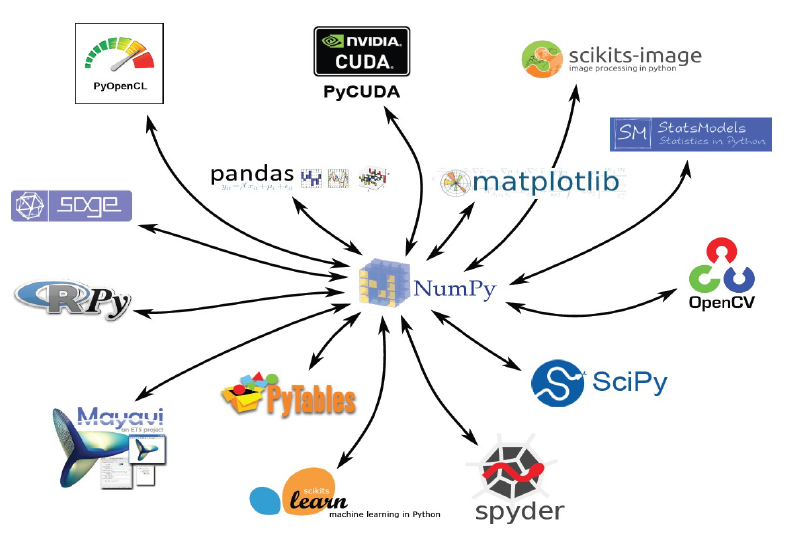

In [2]:
Image(filename="eco.png")

[Numpy](http://numpy.org) contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. [Scipy](http://scipy) contains additional routines for optimization, special functions, and other advanced tasks. Both contain modules written in C and Fortran and optionally linked to BLAS/LAPACK/MKL ...; hence, that they're as fast as possible. Using them together, you can do with Python (roughly) most of the things you did with [Matlab](http://www.mathworks.com/products/matlab/) (Disclaimer: I am not doing a comparison; just, fields of application are the same).

In fact, if you're an experienced Matlab user, there's a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.

Numpy and Scipy are the core of a wider scientific python ecosystem extending in many fields. In addition to those cited in the picture there are many other framework for specific fields such as:

- bioinformatics: [Biopython](https://en.wikipedia.org/wiki/Biopython) 
- computational chemistry and biophysics: [MDAnalysis](http://www.mdanalysis.org/)
- graphs and networks: [NetworkX](http://networkx.github.io/)
- astrophysics: [Astropy][https://en.wikipedia.org/wiki/Astropy]

and many more. Not all of them support Python3.x and some may be based on specific distributions (e.g. Anaconda).

The success of Numpy as a numerical library is due to three main features (in addition of being Python):

- OOS
- Flexible definition of arrays and other objects, inspired from MatLab
- Upon building, may be compiled using user provided math libraries such as BLAS, LAPACK, ATLAS, FFTW, MKL. This yields **significant** speed improvement

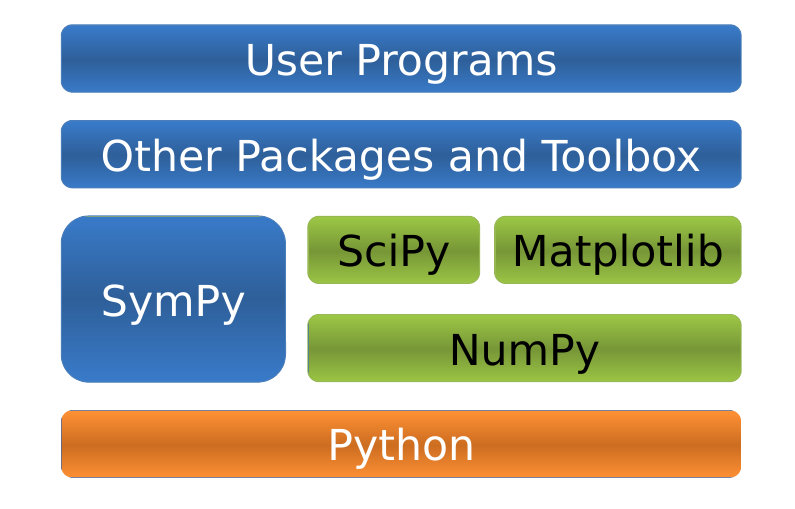

In [3]:
Image(filename="stack.png")

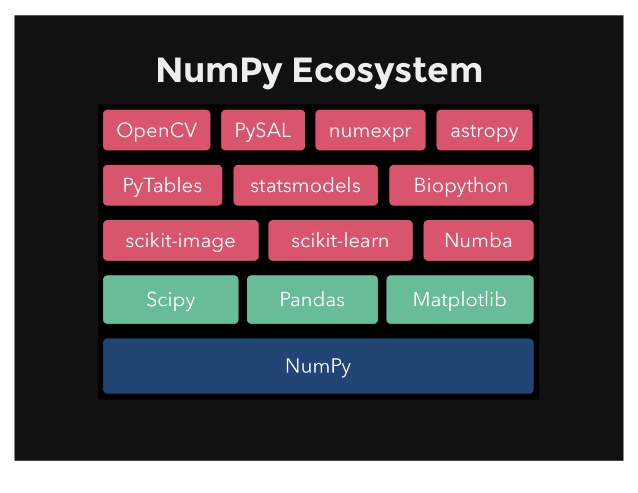

In [4]:
Image(filename="pydata_stack.jpg")

In addition to basic definitions, **Numpy** itself is divided in many submodules:

- **`.core`** and **`.lib`**: basic objects and utilities  
- **`.linalg`**: Linear Algebra utilities
- **`.fft`**: (discrete) Fast Fourier Transform
- **`.random`**: Random number generator
- **`.f2py`**: Automated wrapping of fortran code. *Needed by Scipy*

<a id="basics"></a>

# Numpy Basics

### Numpy arrays: the workhorse datatype of scientific Python

NumPy is a Python C extension library for array-oriented computing. The **numpy array** is the fundamental data type. It has some super awesome features:

1. Efficient.
2. In-memory Contiguous (or Strided)

A numpy array has some basic attributes, such as:

> **Size**:  number of elements in the array

> **Shape**: integer tuple with number of elements for each dimension

### Glossary

We have heard that "everything in Python is an object". For the time being, we consider an object as predefined or user
defined data type with different *properties*.   
E. g. an integer has the property of *value*. We call such properties **attributes**. The **size** and **shape** properties are thus **attributes**. An attribute of an
object can be accessed with the **`.`** syntax:

In [5]:
a = dict()
a.keys()

dict_keys([])

One dimensional arrays have a shape formed by a 1 tuple:

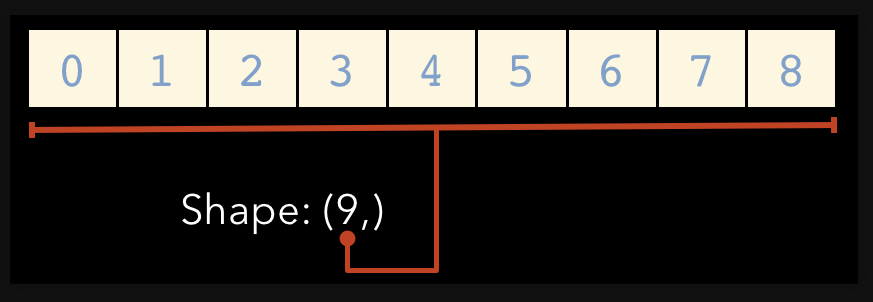

In [6]:
Image(filename="size1.png")

Two dimensional ...

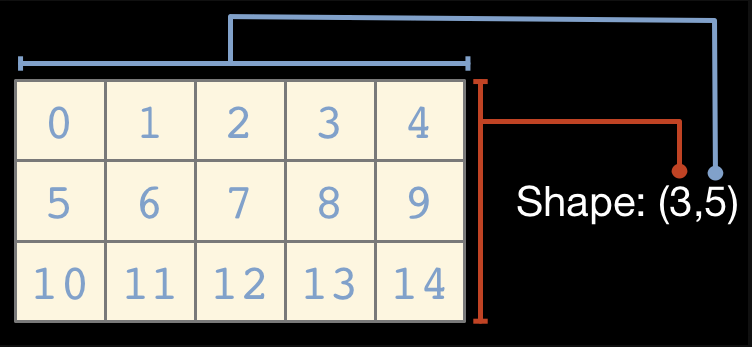

In [7]:
Image(filename="size2.png")

Three dimensional ...

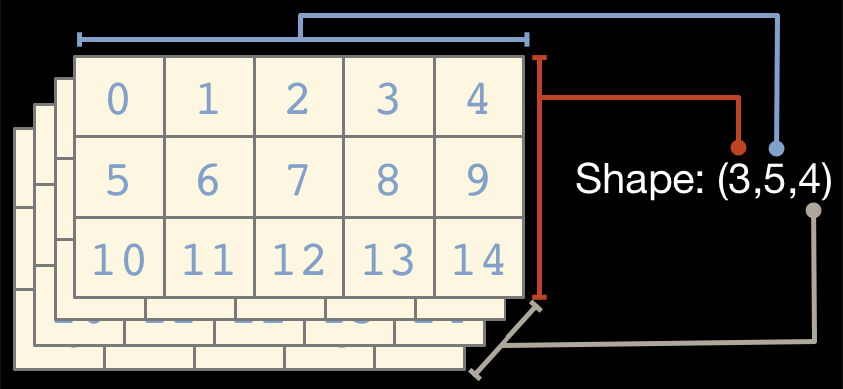

In [8]:
Image(filename="size3.png")

Array types are:

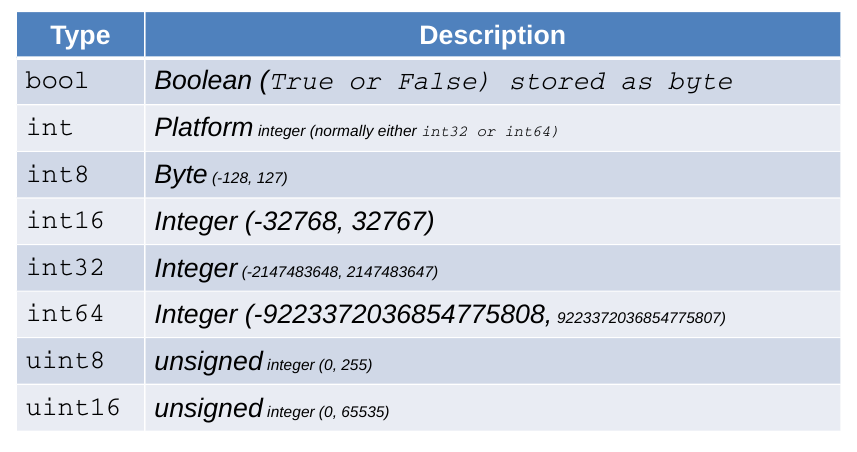

In [9]:
Image(filename="nptypes.png")

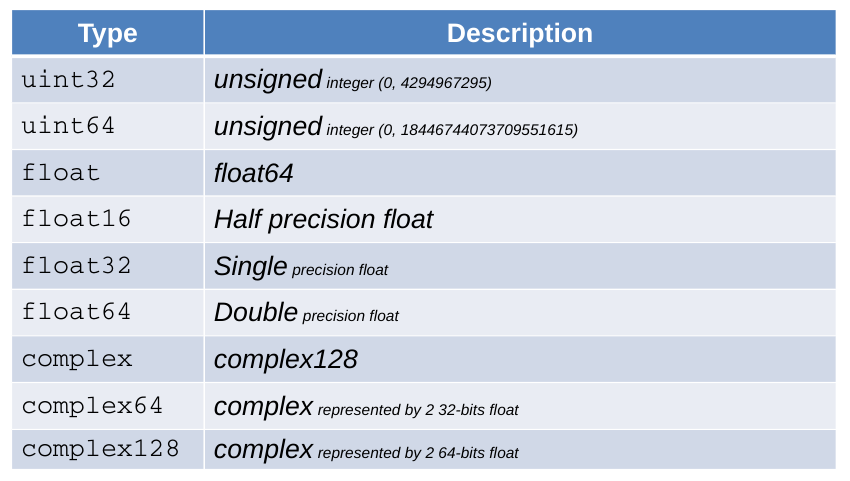

In [10]:

Image(filename="nptypes2.png")

### Array creation and manipulation  

Let's create and manipulate some Numpy arrays:

In [11]:
import numpy as np #a very common abbreviation

In [12]:
a=np.array((1,2,3,4)); a

array([1, 2, 3, 4])

In [13]:
a=np.array([(1,2,3,4),(5,6,7,8)]); a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [14]:
a=a-10; a

array([[-9, -8, -7, -6],
       [-5, -4, -3, -2]])

In [15]:
a=a*2; a

array([[-18, -16, -14, -12],
       [-10,  -8,  -6,  -4]])

In [16]:
a.size

8

the **`shape`** attribute tells you the number of elements in each axis

In [17]:
a.shape

(2, 4)

In [18]:
a.T-a.transpose(), a

(array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]),
 array([[-18, -16, -14, -12],
        [-10,  -8,  -6,  -4]]))

*a is not changed by viewing its transpose*

In [19]:
b=a.T
b

array([[-18, -10],
       [-16,  -8],
       [-14,  -6],
       [-12,  -4]])

In [20]:
a=-a
a

array([[18, 16, 14, 12],
       [10,  8,  6,  4]])

In [21]:
b

array([[-18, -10],
       [-16,  -8],
       [-14,  -6],
       [-12,  -4]])

*b is a new array*

In [22]:
b=a
b

array([[18, 16, 14, 12],
       [10,  8,  6,  4]])

In [23]:
a*b

array([[324, 256, 196, 144],
       [100,  64,  36,  16]])

In [24]:
try:
    a*b.T
except:
    print("this is not a scalar product")

this is not a scalar product


In [25]:
np.dot(a,a.T)

array([[920, 440],
       [440, 216]])

You can assign single elements or general attributes such as the array **shape**:

In [26]:
a[1,1]=1111
a

array([[  18,   16,   14,   12],
       [  10, 1111,    6,    4]])

In [27]:
a.shape

(2, 4)

In [28]:
a.shape = (4,2)

In [29]:
a

array([[  18,   16],
       [  14,   12],
       [  10, 1111],
       [   6,    4]])

Easy creation of useful arrays

In [30]:
np.zeros((3,3),'d')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
np.ones((3,3),dtype="int32")

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [33]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

if we want to specify boundaries or intervals:

In [34]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
np.arange(2.3,3.3,.1)

array([2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2])

In [36]:
np.linspace(2.3,3.3,10)

array([2.3       , 2.41111111, 2.52222222, 2.63333333, 2.74444444,
       2.85555556, 2.96666667, 3.07777778, 3.18888889, 3.3       ])

In [37]:
np.linspace(2.3,3.3,10,False)

array([2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2])

In [38]:
a=np.array(list(map(bool,(0,1,0,1,1,0,1))))
a

array([False,  True, False,  True,  True, False,  True])

Often, you will not create an array element by element; **zeros**, **ones**, **eye**, **arange** and **linspace** provide simple tools for creating arrays.

What if you want to load a table from a text file?

In [39]:
%%bash
awk 'BEGIN{print 0,1,2;print 3,4,5;print 6,7,8}' > table.txt
head table.txt

0 1 2
3 4 5
6 7 8


In [40]:
np.loadtxt("table.txt")

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

## Exercises

1. Become familiar with array creation. Read the documentation of **np.savetxt()** and try it. If some of you uses spreadsheets and want to import some data, have a look at the **csv** module.  
2. Be sure to understand when to use **arange** or **linspace**.  
3. Read the documentation and experiment with **hstack** and **vstack** in conjunction with **savetxt**. Disclaimer: I never remember which is which.  
4. Create a null vector of size 10 but the fifth value which is 1.  
5. Find what requisite a tuple must have to be used to redefine the shape of an existing array.

In [41]:
# Solution 4
a = np.zeros(10,dtype='int')
a[4] = 1
a

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<a id="indexing"></a>

# Array indexing and slicing

Having created arrays we may need to apply operations to some specific elements, i.e. we have to refer to specific elements in the array

In [42]:
a=np.arange(5)
a

array([0, 1, 2, 3, 4])

In [43]:
a[1]

1

In [44]:
a[-1]

4

In [45]:
a[1:]

array([1, 2, 3, 4])

In [46]:
a[-1::-1]

array([4, 3, 2, 1, 0])

Iteration is on the first axis:

In [47]:
a[0]

0

In [48]:
for i in range(3): print(a[3-i-1])

2
1
0


Indexing is very similar to lists; the order of iteration corresponds to the order of dimensions in the array specification. *But* multiple elements in the selection are used for different dimensions.

In [49]:
print(a)
try:
    a[0,1]
except IndexError as e:
    print(e)

[0 1 2 3 4]
too many indices for array: array is 1-dimensional, but 2 were indexed


In [50]:
try:
    a[0][1]
except Exception as e:
    print(e)

invalid index to scalar variable.


In [51]:
a = np.arange(6); a.shape = (2,3)
print(a[0,1],a[0][1])

1 1


In [52]:
a[0,1:], len(a)

(array([1, 2]), 2)

The general syntax is: 

    i:j:k 
    
with:

- i=start (defaults to zero, i.e. first element on axis)  
- j=end (defaults to a.shape[n] for axis n) 
- k=stride (defaults to 1, i.e. all elements). 

Ellipsis, or … is expanded as :,:, up to the number of axes not explicitly set.

In [53]:
a[...,2]

array([2, 5])

Other basic utilities save you a lot of time:

In [54]:
np.max(a)

5

In [55]:
np.mean(a)

2.5

you can specify only a part of an array:

In [56]:
np.mean(a[0])

1.0

Array dimensions are listed in **axes**. The **axis** keyword allows to specify rows or columns. Many numpy methods do reduction operations (e. g. a sum) over one or more axes. The default is **`axis=None`** hence the reduction is over all elements (the array becomes a scalar).

In [57]:
a = np.arange(10)
a.shape = (2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [58]:
a.sum()

45

Reduction on first (0) dimension is done with **`axis=0`**:

In [59]:
a.sum(axis=0)

array([ 5,  7,  9, 11, 13])

Reduction on second (1) dimension is done with **`axis=1`**:

In [60]:
print(a)
a.mean(axis=1), a.std(axis=1)

[[0 1 2 3 4]
 [5 6 7 8 9]]


(array([2., 7.]), array([1.41421356, 1.41421356]))

## Exercises

1. Create a 2x2x2 array with random values. Use introspection.  
2. Create an array whose first row goes from 0 to 100 (closed) with a stride of 4 and the second from 200 to 100 with stride 4.  
3. Create a 4x4 random matrix with values in [0,100]. Then transform it so that values have mean 0 and std. dev. 1 

### Hints
[Feature scaling](#https://en.wikipedia.org/wiki/Feature_scaling)

In [61]:
# Solution 1
A = np.random.random((2,2,2))
A

array([[[0.44259195, 0.66238183],
        [0.13984184, 0.78947311]],

       [[0.99437303, 0.93465712],
        [0.68629323, 0.67812431]]])

In [62]:
# Solution 2
a = np.arange(1,201,4)
a[25:] = a[-1:24:-1]
a.shape = (2,25)
a

array([[  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
         53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97],
       [197, 193, 189, 185, 181, 177, 173, 169, 165, 161, 157, 153, 149,
        145, 141, 137, 133, 129, 125, 121, 117, 113, 109, 105, 101]])

In [63]:
# solution 3
A = np.random.random((4,4))
mu,sigma = A.mean(), A.std()
A = (A-mu)/sigma
print(A.mean(), A.std())
A

-1.8041124150158794e-16 0.9999999999999999


array([[-0.61945769, -1.7119858 , -0.14910592,  1.43372074],
       [-0.22031101,  1.38224339, -1.21520111, -0.3762895 ],
       [-1.04118657,  0.62816905,  0.37214917,  0.23016827],
       [ 1.95615416, -0.18001175,  0.58657956, -1.07563497]])

<a id="view"></a>

# View and copy

In [64]:
a=np.arange(25)
a.shape = (5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [65]:
b=a[1]; b

array([5, 6, 7, 8, 9])

In [66]:
b=b*10; b

array([50, 60, 70, 80, 90])

In [67]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [68]:
b=a[1]; b[:] = 100; b

array([100, 100, 100, 100, 100])

In [69]:
a

array([[  0,   1,   2,   3,   4],
       [100, 100, 100, 100, 100],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])

What happened? when you have created **b** in the first place, it was a **view** or **reference** to some elements in a; assigning it to a new variable caused the **unbinding** of b from a.

But just reassiging all the elements was done on the view of a.

Each operation basic slicing operation yields a view of the target array or (in C terms) creates a reference to a section of the target array even if they have different ids.

*A view is an array that does not own its data, but refers to another array’s data instead*. 

In [70]:
id(a)

140182148306480

In [71]:
b=a[:,2]; print(id(b)); b

140182148308400


array([  2, 100,  12,  17,  22])

In [72]:
b=a[1].copy()
b

array([100, 100, 100, 100, 100])

In [73]:
b=b/10
b

array([10., 10., 10., 10., 10.])

In [74]:
a

array([[  0,   1,   2,   3,   4],
       [100, 100, 100, 100, 100],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])

Selection works on both axes at the same time; *a is not an array of arrays.*

In [75]:
a=np.array(range(25))
a.shape=(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [76]:
a[1:4:2,1:4:2]

array([[ 6,  8],
       [16, 18]])

Summary of slicing operations:

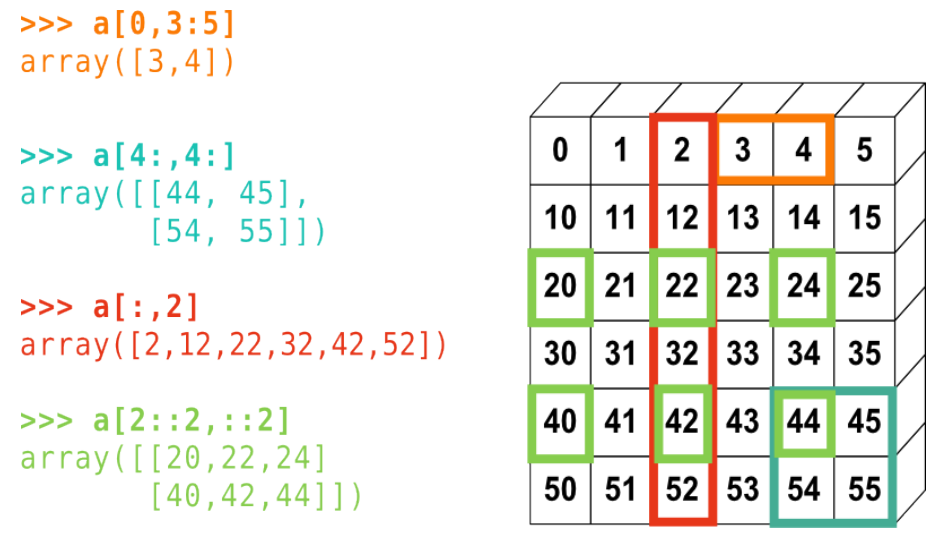

In [77]:
Image(filename="slice.png")

## Exercises

1. Create the array below (not element-wise), then extract the 2 nd and 4th row:

        [10, 65, 110],
        [21, 76, 121],
        [32, 87, 132],
        [43, 98, 143],
        [54, 109, 154]]
2. Calculate the mean on the 1st and 3rd column.
3.  Declare a 8x8 matrix and fill it with a checkerboard patern, like this:

        [[0,1],
        [1,0]]


### Hints

1,2 – Use the reshape and mean methods. On one line you can build
more than one array on the fly.

3 – Start with a white board a use slicing to colour it.


In [78]:
#Solution 1,2:
a = np.array([i for i in range(1,16)])*10 + np.array([i%10 for i in range(15)])
a

array([ 10,  21,  32,  43,  54,  65,  76,  87,  98, 109, 110, 121, 132,
       143, 154])

In [79]:
a.shape = (5,3)
a.shape

(5, 3)

In [80]:
a

array([[ 10,  21,  32],
       [ 43,  54,  65],
       [ 76,  87,  98],
       [109, 110, 121],
       [132, 143, 154]])

In [81]:
np.mean(a[:,0])

74.0

In [82]:
#Solution 3
Z = np.zeros((8,8))
Z

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [83]:
#start with odd rows
Z[::2,1::2] = 1
Z

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [84]:
Z[1::2,::2] = 1
Z

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

<a id="speed"></a>

# Need for speed?

Python carries you in relative confort where you want

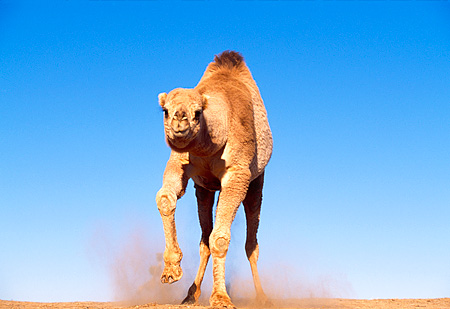

In [85]:
Image(filename="camel.jpg")

Is that enough?

No. As mentioned in the first slide it is not enough to made it feasible even for basic scientific computing. We want something with this performance:

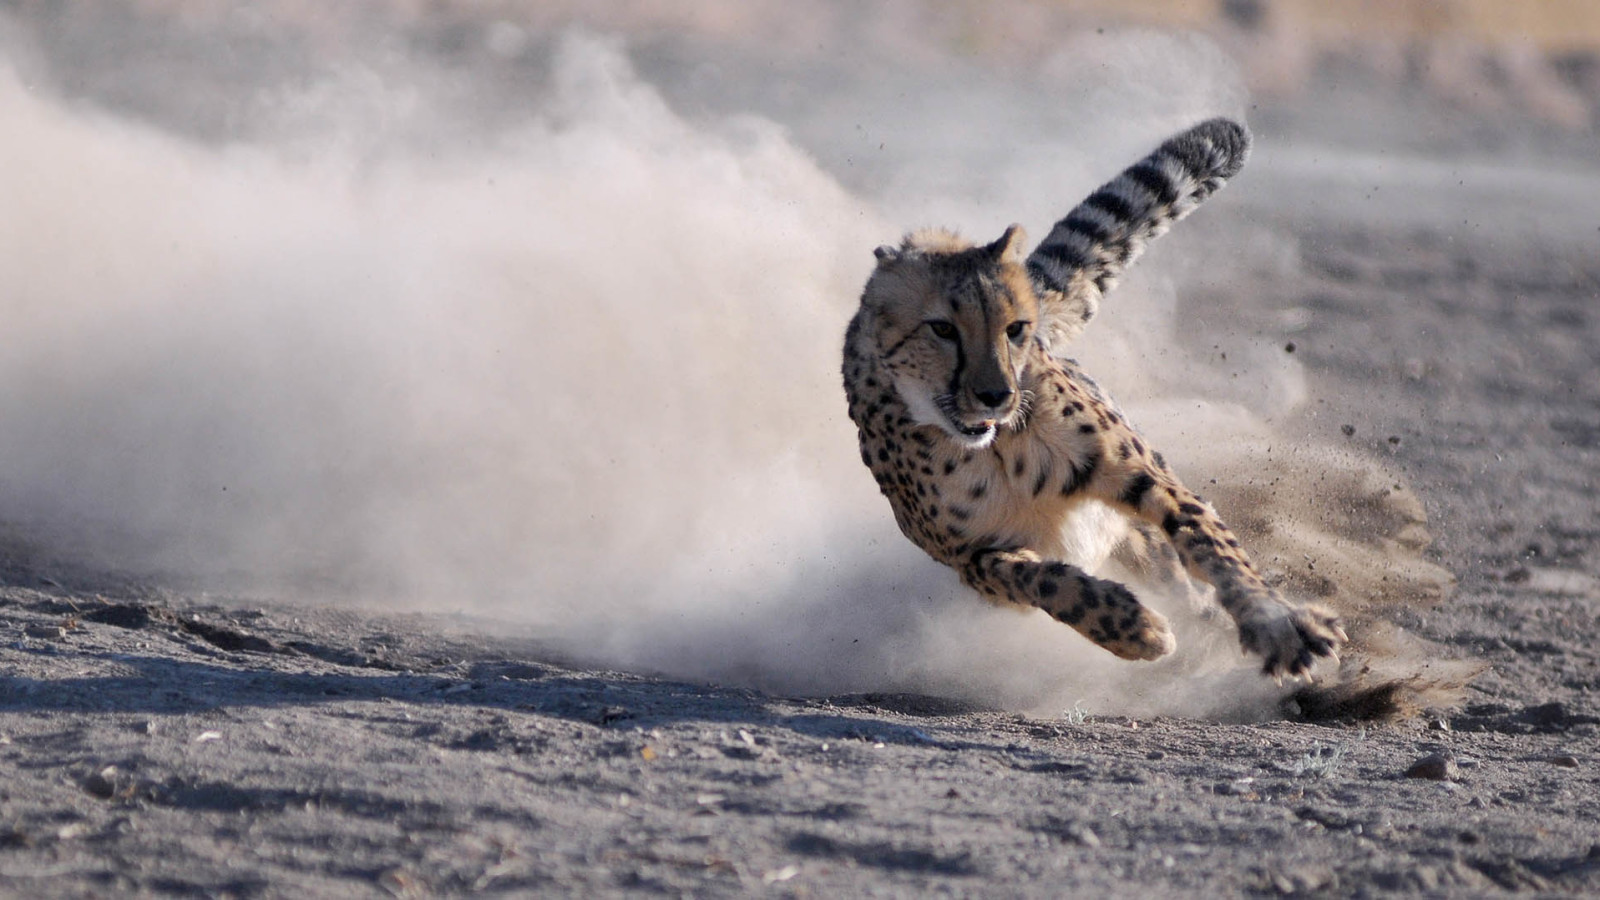

In [86]:
Image(filename="cheetah.jpg")

In [87]:
def listcomp():
    [i**2 for i in range(1000)]

In [88]:
def usenumpy():
    a = np.arange(1000)
    b=a**2

In [89]:
%timeit listcomp()

396 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%timeit usenumpy()

7.42 µs ± 34.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


numpy is about 20 times faster ...
but maybe not a cheetah
in a future class we will how much fast we can run

<a id="ufunc"></a>

# Universal Functions

Numpy provides **Universal Functions** (ufunc) that operate on all elements of an array without using explicit loops in the interpreter, yielding a huge performance gain.

They are actually *wrappers* written directly in **C** or Fortran. `arange`, for instance, is one such *ufunc*.
When typing simple operations between arrays, you actually use the corresponding ufunc:

    a*b is np.multiply(a,b)
    
there *ufunc* for many common tasks such as sum, mean (you already used it), floor, ..., see the [documentation](#https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

In [91]:
a = np.random.random(10)
a

array([0.8484555 , 0.38287014, 0.09648073, 0.62925162, 0.9915193 ,
       0.67763188, 0.31550309, 0.16953502, 0.12814705, 0.76055568])

In [92]:
np.square(a)

array([0.71987674, 0.14658954, 0.00930853, 0.39595761, 0.98311052,
       0.45918496, 0.0995422 , 0.02874212, 0.01642167, 0.57844494])

In [93]:
np.exp(a)

array([2.33603606, 1.46648758, 1.10128836, 1.87620595, 2.69532637,
       1.96920888, 1.37094885, 1.18475383, 1.13672014, 2.13946474])

<a id="broad"></a>

# Broadcasting

Operations between numpy arrays are easy to manage as long as the arrays have the same shape: they take place elementwise.   
However, arrays with diferent shape may be combined as long as is possible to convert them into new arrays with the same shape. This is called **broadcasting** and a **broadcasting error** is raised when not possible.

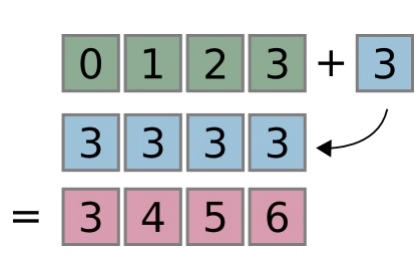

In [94]:
Image(filename="broad.png")

Broadcasting takes place for each array involved in the operation, expanding the smaller axis dimension to match that of the other array. *Expand* means repeat the array over that axis.

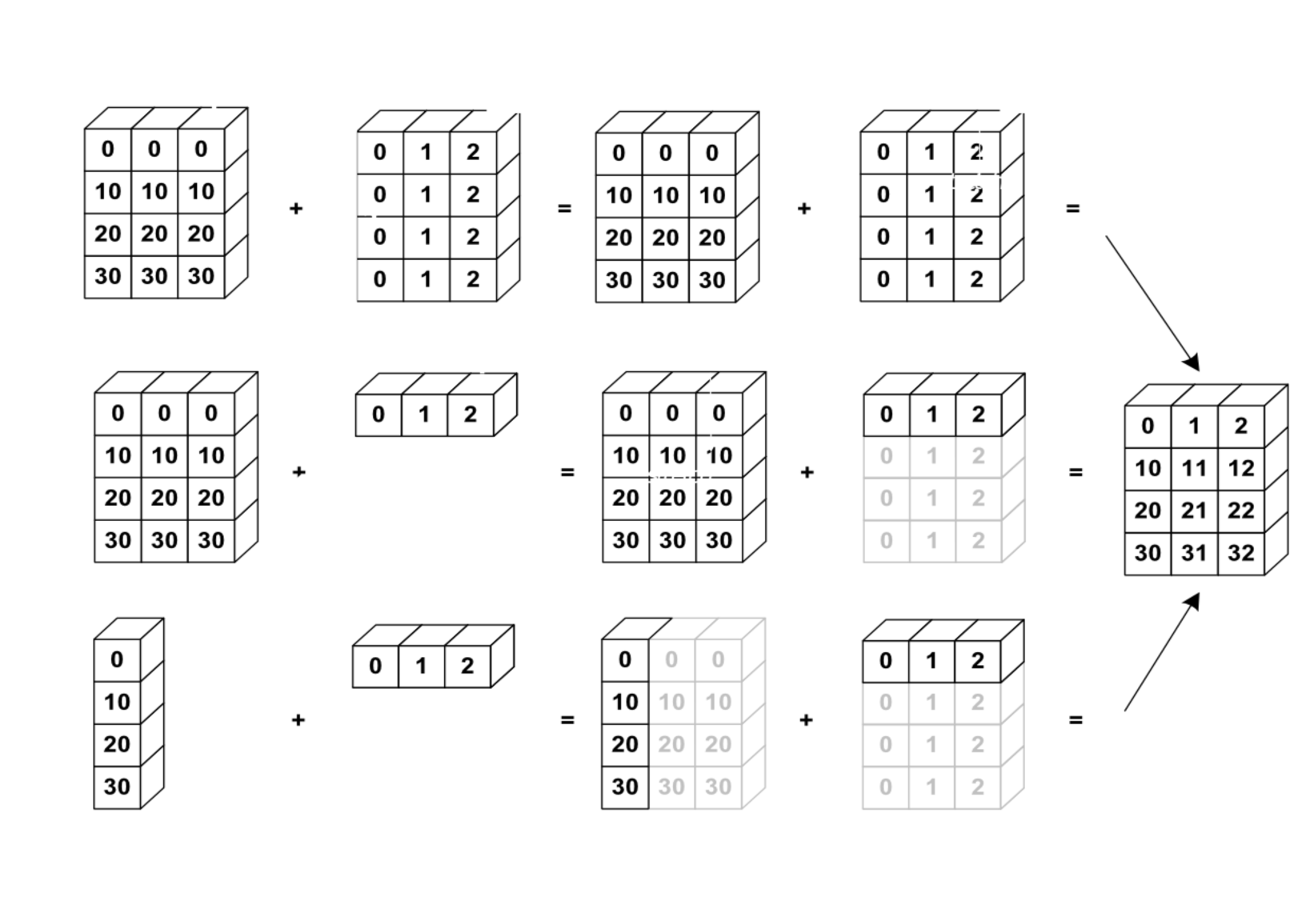

In [95]:
Image(filename="broad2.png")

In [96]:
a = np.array([1,2,3])
b = np.array([[1,2,3],[4,5,6]])
c = a + b
print(a.shape,b.shape,c.shape)
c

(3,) (2, 3) (2, 3)


array([[2, 4, 6],
       [5, 7, 9]])

In [97]:
a = np.arange(6) 
a = a.reshape((2,1,3))
print(a.shape)
a

(2, 1, 3)


array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [98]:
b = np.arange(8) 
b = b.reshape((2,4,1))
print(b.shape)
b

(2, 4, 1)


array([[[0],
        [1],
        [2],
        [3]],

       [[4],
        [5],
        [6],
        [7]]])

In [99]:
c = a + b
print(c.shape)
c

(2, 4, 3)


array([[[ 0,  1,  2],
        [ 1,  2,  3],
        [ 2,  3,  4],
        [ 3,  4,  5]],

       [[ 7,  8,  9],
        [ 8,  9, 10],
        [ 9, 10, 11],
        [10, 11, 12]]])

Broadcasting is not always possible:

In [100]:
a = np.arange(15).reshape(((3,5))) #reshape method
a.shape

(3, 5)

In [101]:
b = np.arange(7)
b.shape

(7,)

In [102]:
try:
    print(a+b)
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,5) (7,) 


## Exercise

Consider an array of dimension (4,4,2), how to mulitply it by an array with dimensions (4,4). Hint: read the documentation of **`np.newaxis`**

In [103]:
A = np.ones((4,4,2))
B = np.random.random(16); B.shape = (4,4)

In [104]:
try:
    A*B
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (4,4,2) (4,4) 


In [105]:
A*B[:,:,np.newaxis]

array([[[0.41318343, 0.41318343],
        [0.21881177, 0.21881177],
        [0.20163238, 0.20163238],
        [0.63585193, 0.63585193]],

       [[0.71030447, 0.71030447],
        [0.79367304, 0.79367304],
        [0.50266481, 0.50266481],
        [0.13772021, 0.13772021]],

       [[0.00818023, 0.00818023],
        [0.56128662, 0.56128662],
        [0.71375525, 0.71375525],
        [0.63420334, 0.63420334]],

       [[0.19361677, 0.19361677],
        [0.59183153, 0.59183153],
        [0.24574404, 0.24574404],
        [0.71320434, 0.71320434]]])

<a id="adv"></a>

# Advanced indexing

The syntax `[start:stop:step]` creates a slice object that can be used for *basic slicing*. Basic slicing can also be performed with **non array** sequences such as lists or tuples:

In [106]:
a = np.arange(25)
a.shape = (5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [107]:
b = list((1,2,3))
c = a[b]
a[:] -= 1
c

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [108]:
id(a),id(c)

(140182843453040, 140182843453136)

In [109]:
a

array([[-1,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23]])

In [110]:
c

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Indexing can also be performed using other numpy arrays (not lists or tuples!). This however creates **copies** of arrays, **not views** !!

In [111]:
a=np.array(range(-8,8))
a.shape=(4,4)
a

array([[-8, -7, -6, -5],
       [-4, -3, -2, -1],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [112]:
b = np.array(b); b

array([1, 2, 3])

c is a copy:

In [113]:
c = a[b]
a *= 10
c

array([[-4, -3, -2, -1],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [114]:
a

array([[-80, -70, -60, -50],
       [-40, -30, -20, -10],
       [  0,  10,  20,  30],
       [ 40,  50,  60,  70]])

You can use multiple slicing objects in combination:

In [115]:
a=np.array(range(-8,8))
a.shape=(4,4)
a

array([[-8, -7, -6, -5],
       [-4, -3, -2, -1],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [116]:
a[[1,2,3],1]

array([-3,  1,  5])

In addition to slicing it is possible to refer to a selection of elements in a numpy array using another array as a pattern or mask. 

In [117]:
a = np.array(range(-8,8))
a.shape = (4,4)

In [118]:
c = a > 0
c

array([[False, False, False, False],
       [False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [119]:
g0 = a[c]
a += 1
g0

array([1, 2, 3, 4, 5, 6, 7])

with multiple slicing lists, elements are evaluated at the same time along all axes; 

to take element (1,1) or (2,2) or (3,3) (note how order is dictated by the slicing lists):

In [120]:
a[[3,2],[3,2]]

array([8, 3])

All elements have to be **explicitly** selected. To obtain the lower right 2x2 array:

In [121]:
a[[2,3]][:,[2,3]]

array([[3, 4],
       [7, 8]])

We can also use a *list of lists*

In [122]:
rows = [[2],[3]]
cols = [2,3]
a[rows,cols]

array([[3, 4],
       [7, 8]])

this is like taking 

    rows[0]*cols[0]

etc … But rows[0] is a list, or, has shape (1,), thus cols is expanded from a scalar to [2], with shape (1,); instead of taking element (2,2) we take row 2 by column 2. 

Numpy provides a huge number of functions and/or array methods that allow to directly search, sort or reduce the arrays.
These methods ofen call directly optimized C code and are fastter than native Python code.

In [123]:
a = np.arange(100)
a.shape = (10,10)
a = a[1,::-1]
a

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10])

In [124]:
np.argsort(a)

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [125]:
b =  np.argsort(a)
a[b]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

#### `numpy.where`

In [126]:
a = np.arange(-8,8)
np.where(a>0)

(array([ 9, 10, 11, 12, 13, 14, 15]),)

In [127]:
a.shape = (4,4)
np.where(a>0)

(array([2, 2, 2, 3, 3, 3, 3]), array([1, 2, 3, 0, 1, 2, 3]))

`np.where` returns a *tuple of arrays* satisfying the condition over all the axes given. 

## Exercise

The data in populations.txt describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years. 

Compute and print, based on the data in populations.txt:  
1. The mean and std of the populations of each species for the years in the period.  
2. Which year each species had the largest population.  
3. Which species has the largest population for each year.  
4. Which years any of the populations is above 500000.  

### Hints

1 – Use np.mean() and np.std()

2,3 – np.argmax(), advanced indexing

4 – comparisons and np.any


In [128]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T
populations = data[:,1:]
print(" Hares, Lynxes, Carrots")
print("Mean:", populations.mean(axis=0))
print("Std:", populations.std(axis=0))

 Hares, Lynxes, Carrots
Mean: [34080.95238095 20166.66666667 42400.        ]
Std: [20897.90645809 16254.59153691  3322.50622558]


In [129]:
j_max_years = np.argmax(populations, axis=0)
#this is fancy indexing
print("Max. year:", year[j_max_years])

Max. year: [1903. 1904. 1900.]


In [130]:
max_species = np.argmax(populations, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])
print("Max species:")
print(year)
print(species[max_species])
above_50000 = np.any(populations > 50000, axis=1)
print("Any above 50000:", year[above_50000])

Max species:
[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
['Carrot' 'Carrot' 'Hare' 'Hare' 'Lynx' 'Lynx' 'Carrot' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot' 'Hare' 'Hare' 'Hare' 'Lynx' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot']
Any above 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


<a id="msk"></a>

# Masked arrays

Often, we have to deal with missing data or run over an array several times, each time picking up a part of it. One way of handling this is to fill the array with **`NaN`**, and then write functions that ignores **`NaN`s**.
For instance, we might want to sum over all not NaN. 
Numpy already provides:
       
       nanmean, nanmax, nanmin, nanargmax, nanargmin, nanstd, nanvar, nansum

another approach is possible by using masked arrays:

In [131]:
import numpy.ma as MA
a = np.arange(-8,8); a.shape = (4,4)
mask = a%2==0
a_masked = MA.array(a,mask=mask)
print("Shape: ",a_masked.shape)
a_masked

Shape:  (4, 4)


masked_array(
  data=[[--, -7, --, -5],
        [--, -3, --, -1],
        [--, 1, --, 3],
        [--, 5, --, 7]],
  mask=[[ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False]],
  fill_value=999999)

To deal only with *valid* values:

In [132]:
a_masked.compressed()

array([-7, -5, -3, -1,  1,  3,  5,  7])

To get the mask:

In [133]:
MA.getmaskarray(a_masked)

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

Note that operating with masked array gives you back a masked array:

In [134]:
b = a_masked-np.ones(a_masked.shape[0])*10
b

masked_array(
  data=[[--, -17.0, --, -15.0],
        [--, -13.0, --, -11.0],
        [--, -9.0, --, -7.0],
        [--, -5.0, --, -3.0]],
  mask=[[ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False],
        [ True, False,  True, False]],
  fill_value=999999)

In [135]:
type(b)

numpy.ma.core.MaskedArray

## Exercise

Build a boolean vector and a square matrix with trailing dimension equal to the vector's lenght'. Then
calculate the maximum sum along rows for each row. Finally, find the row number that yields the maximum sum. 
The sum should consider only valid (non False) elements in rows and columns; valid elements are determined by matching
the index in the vector.

In [136]:
N = 100
vec = np.random.random(N) >= 0.5
print(vec.shape)
vec[:10]

(100,)


array([False, False, False,  True,  True, False, False,  True, False,
       False])

In [137]:
mat = np.random.random(N*N)
mat.shape = (N,N)
mat[0,:5]

array([0.51595797, 0.74222418, 0.78336248, 0.45175504, 0.30532187])

In [138]:
vect = vec[np.newaxis,:].T
print(vect.shape)
square_mask = vec*vect
square_mask.shape

(100, 1)


(100, 100)

In [139]:
mat_masked = MA.array(mat,mask=square_mask)
sum_max = np.max(mat_masked.sum(axis=1))
where_max = mat_masked.sum(axis=1).argmax()
sum_max, where_max, mat_masked[where_max].sum()

(55.33545086355203, 46, 55.33545086355203)

<a id="mat"></a>

# Matrix Solvers

You can solve systems of linear equations using the solve command from the linear algebra submodule:

In [140]:
import numpy.linalg as LA

In [141]:
A = np.array([[1,1,1],[0,2,5],[2,5,-1]])
b = np.array([6,-4,27])
LA.solve(A,b)

array([ 5.,  3., -2.])

There is a number of routines to compute eigenvalues and eigenvectors

* **eigvals** returns the eigenvalues of a matrix
* **eigvalsh** returns the eigenvalues of a Hermitian matrix
* **eig** returns the eigenvalues and eigenvectors of a matrix
* **eigh** returns the eigenvalues and eigenvectors of a Hermitian matrix.

In [142]:
A = np.array([[13.,-4.],[-4.,7.]])
LA.eigvalsh(A)

array([ 5., 15.])

In [143]:
LA.eigh(A)

(array([ 5., 15.]),
 array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]))

<a id="int"></a>

# Numpy internals

From the documentation:

NumPy arrays consist of two major components, the raw array data (from now on, referred to as the data buffer), and the information about the raw array data. The data buffer is typically what people think of as arrays in C or Fortran, a contiguous (and fixed) block of memory containing fixed sized data items. NumPy also contains a significant set of data that describes how to interpret the data in the data buffer. This extra information contains (among other things):

- The basic data element’s size in bytes
- The start of the data within the data buffer (an offset relative to the beginning of the data buffer).
- The number of dimensions and the size of each dimension
- The separation between elements for each dimension (the ‘stride’). This does not have to be a multiple of the element size
- The byte order of the data (which may not be the native byte order)
- Whether the buffer is read-only
- Information (via the dtype object) about the interpretation of the basic data element. The basic data element may be as simple as a int or a float, or it may be a compound object (e.g., struct-like), a fixed character field, or-  - Python object pointers.
- Whether the array is to interpreted as C-order or Fortran-order.



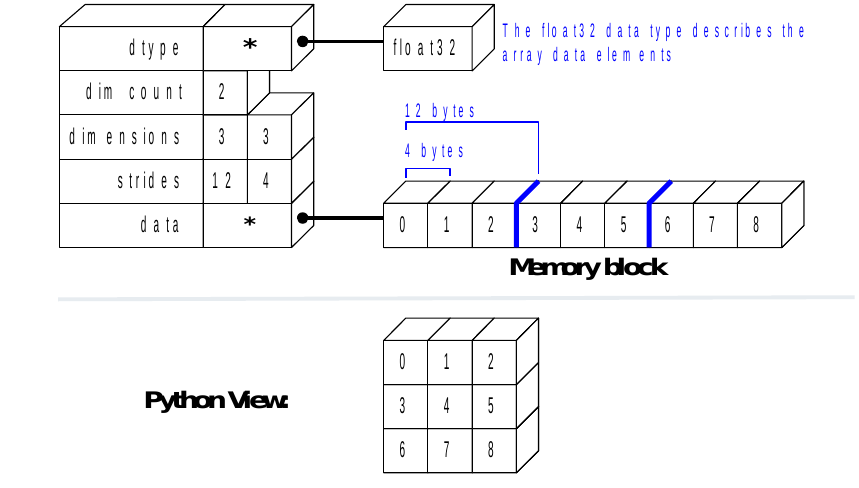

In [144]:
Image(filename="array.png")

Ndarray definition in numpy/core/include/numpy/ndarrayobject.h:

    typedef struct PyArrayObject {
        PyObject_HEAD
        char *data; // pointer to raw data buffer 
        int nd; // number of dimensions, also called ndim 
        npy_intp *dimensions; // size in each dimension 
        npy_intp *strides; // bytes to jump to get to the next 
        // element in each dimension 
        PyObject *base; 
        PyArray_Descr *descr; /* Pointer to type structure */
        int flags; /* Flags describing array 
         */
        PyObject *weakreflist; /* For weakreferences */
    } PyArrayObject;

# The End!